In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collecting

In [3]:
def load_dataset():
    file = ("2019.csv")
    df = pd.read_csv(file)
    return df

load_dataset()

,Google Cloud Region,Location,Google CFE,Lifecycle grid carbon intensity (gCO2eq / kWh)
0,asia-east1,Taiwan,0.19,541
1,asia-east2,Hong Kong,NaN,506
2,asia-northeast1,Tokyo,NaN,569
3,asia-northeast2,Osaka,NaN,414
4,asia-northeast3,Seoul,NaN,490
5,asia-south1,Mumbai,NaN,752
6,asia-southeast1,Singapore,0.03,493
7,asia-southeast2,Jakarta,NaN,647
8,australia-southeast1,Sydney,0.11,725
9,europe-north1,Finland,0.77,181


In [4]:
def print_summarize_dataset(df):
    print("Data Types:")
    print(df.dtypes)
    print()
    print("Statistical summary:")
    display(df.describe())
    
df = load_dataset()
print_summarize_dataset(df)

Data Types:
Google Cloud Region                                object
Location                                           object
Google CFE                                        float64
Lifecycle grid carbon intensity (gCO2eq / kWh)      int64
dtype: object

Statistical summary:


,Google CFE,Lifecycle grid carbon intensity (gCO2eq / kWh)
count,16.000000,24.000000
mean,0.475625,398.583333
std,0.290309,204.820158
min,0.030000,27.000000
25%,0.190000,235.000000
50%,0.545000,476.500000
75%,0.702500,514.750000
max,0.890000,752.000000


# Data Exploration

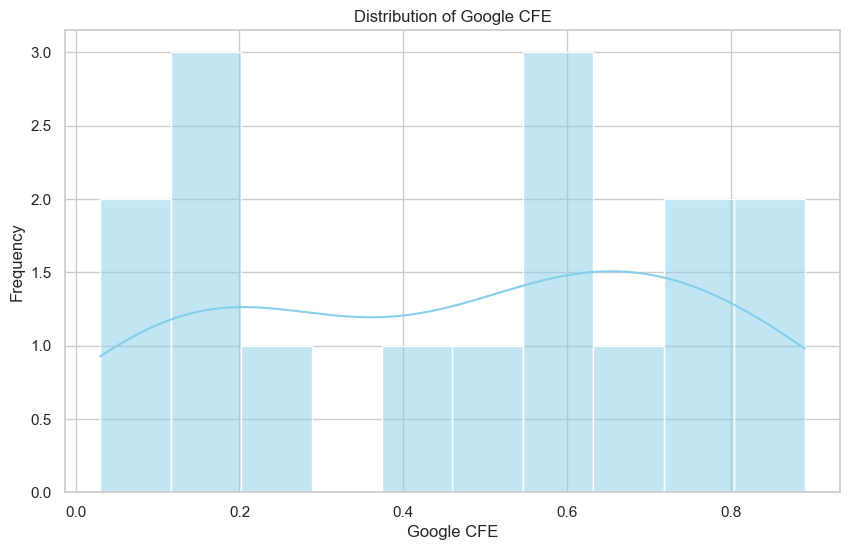

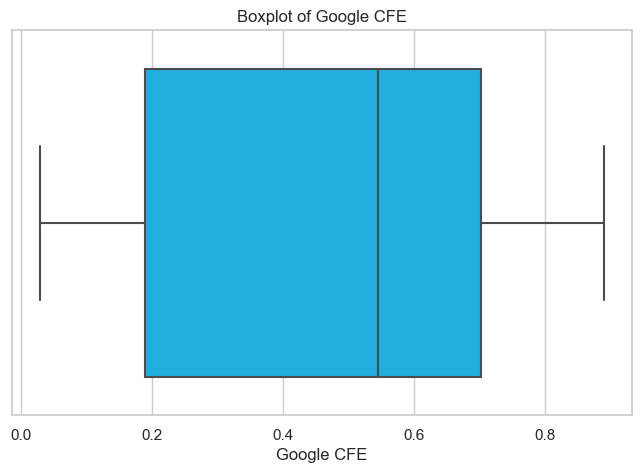

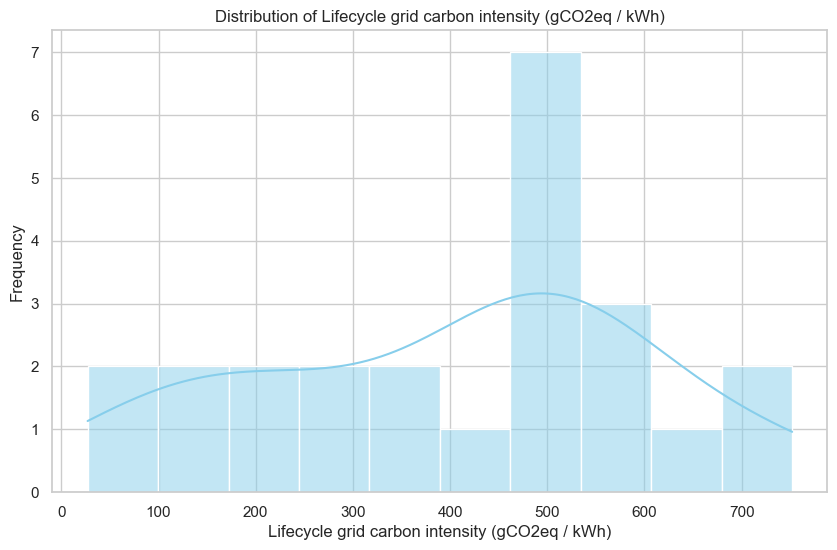

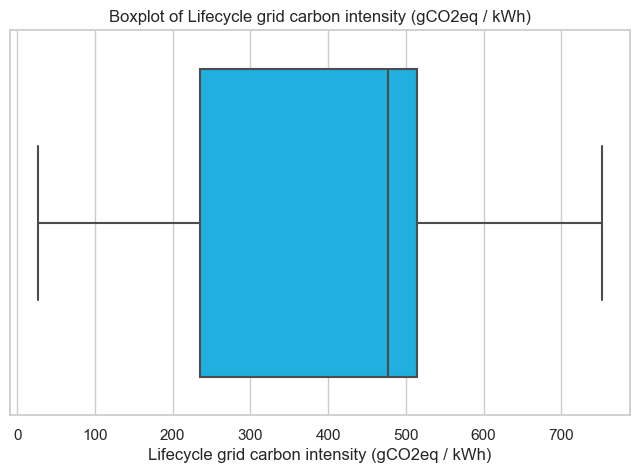

In [5]:
def print_histograms(df):
    columns = ['Google CFE', 'Lifecycle grid carbon intensity (gCO2eq / kWh)']
    sns.set(style="whitegrid", palette="pastel")
    
    for column in columns:
        #Histograms
        plt.figure(figsize=(10,6))
        sns.histplot(df[column], kde=True, color='skyblue', bins=10)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        
        #Boxplot
        plt.figure(figsize=(8,5))
        sns.boxplot(x=df[column], color='deepskyblue')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()
        
print_histograms(df)
        

### Distribución de Google CFE:
#### El histograma muestra que los valores de Google CFE están distribuidos de manera relativamente uniforme entre 0.0 y 0.9, con algunos picos alrededor de 0.2 y 0.7.
#### La estimación de densidad de Kernel (KDE) sugiere que la distribución no es completamente uniforme y presenta cierta variabilidad, lo que podría ser interesante para analizar más a fondo.
#### El boxplot confirma que no hay outliers significativos en esta variable; los datos están bastante bien distribuidos dentro del rango intercuartílico.

### Distribución de Lifecycle Grid Carbon Intensity (gCO2eq / kWh):
#### El histograma muestra que la mayoría de los valores se agrupan entre 400 y 500 gCO2eq/kWh. También hay algunos valores más bajos (cercanos a 0) y otros dispersos por encima de 700, lo que indica que hay una variabilidad considerable.
#### El KDE muestra un pico pronunciado alrededor de 500 gCO2eq/kWh, lo que sugiere una tendencia central.
#### El boxplot muestra que los datos están algo sesgados a la derecha. Aunque no hay outliers significativos, hay un rango considerable de valores.

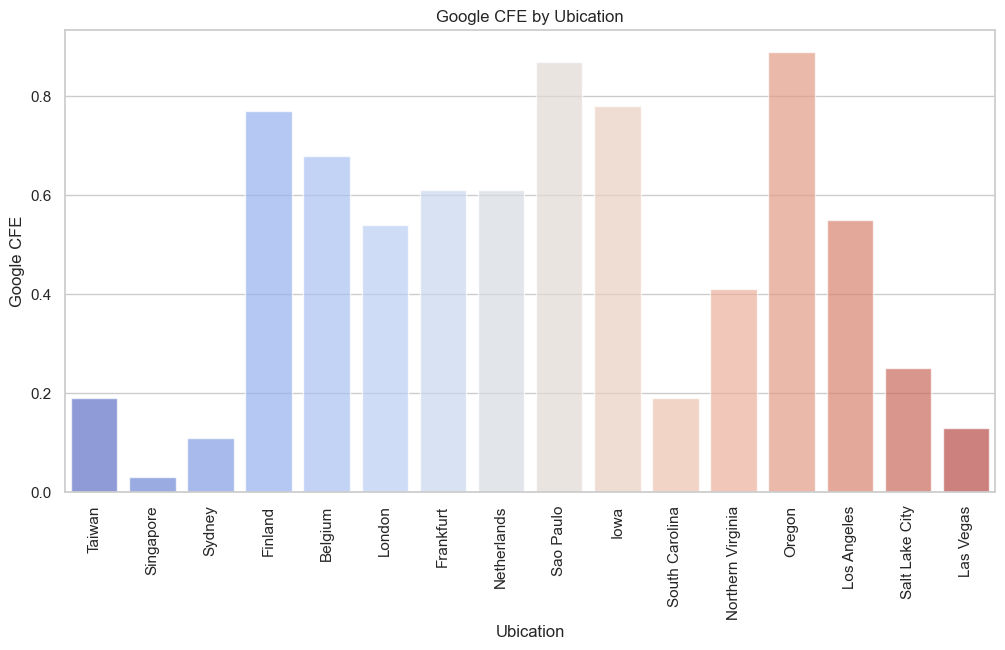

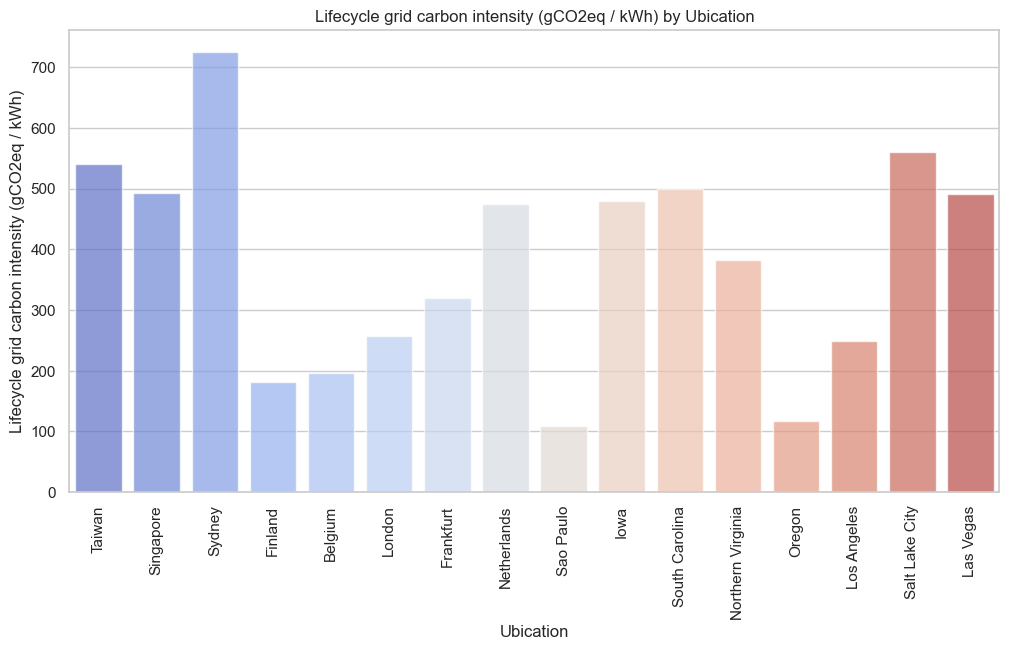

In [6]:
def bar_chart(df):
    df = df.dropna(subset=['Google CFE', 'Lifecycle grid carbon intensity (gCO2eq / kWh)'])
    
    columns = ['Google CFE', 'Lifecycle grid carbon intensity (gCO2eq / kWh)']
    
    for column in columns:
        plt.figure(figsize=(12,6))
        sns.barplot(x='Location', y=column, data=df, palette='coolwarm', alpha=0.7)
        plt.xticks(rotation=90)
        plt.title(f'{column} by Location')
        plt.xlabel('Location')
        plt.ylabel(column)
        plt.show()

bar_chart(df)

In [5]:
import folium
from folium.plugins import HeatMap

### Fuentes Comunes para Obtener Coordenadas:
### Google Maps API: Google Cloud Geocoding API

In [14]:
# Define a function to create a geographic heat map
def geographic_heat_map(df):
    # Dictionary of approximate coordinates for each Google Cloud region
    coordinates = {
        'asia-east1': (25.0330, 121.5654),  # Taiwan
        'asia-east2': (22.3193, 114.1694),  # Hong Kong
        'asia-northeast1': (35.6895, 139.6917),  # Tokyo
        'asia-northeast2': (34.6937, 135.5023),  # Osaka
        'asia-northeast3': (37.5665, 126.9780),  # Seoul
        'asia-south1': (19.0760, 72.8777),  # Mumbai
        'asia-southeast1': (1.3521, 103.8198),  # Singapore
        'asia-southeast2': (-6.2088, 106.8456),  # Jakarta
        'australia-southeast1': (-33.8688, 151.2093),  # Sydney
        'europe-north1': (60.1699, 24.9384),  # Finland
        'europe-west1': (50.8503, 4.3517),  # Belgium
        'europe-west2': (51.5074, -0.1278),  # London
        'europe-west3': (50.1109, 8.6821),  # Frankfurt
        'europe-west4': (52.3676, 4.9041),  # Netherlands
        'europe-west6': (47.3769, 8.5417),  # Zurich
        'northamerica-northeast1': (45.5017, -73.5673),  # Montreal
        'southamerica-east1': (-23.5505, -46.6333),  # Sao Paulo
        'us-central1': (41.8780, -93.0977),  # Iowa
        'us-east1': (33.8361, -81.1637),  # South Carolina
        'us-east4': (39.0438, -77.4874),  # Northern Virginia
        'us-west1': (45.5234, -122.6762),  # Oregon
        'us-west2': (34.0522, -118.2437),  # Los Angeles
        'us-west3': (40.7608, -111.8910),  # Salt Lake City
        'us-west4': (36.1699, -115.1398)   # Las Vegas
    }
    
    # Create a pandas DataFrame with the added coordinates
    df['Coordinates'] = df['Google Cloud Region'].map(coordinates)
    
    # Create a basemap centered on mean coordinates
    map_center = [20, 0] # Approximate center of the map
    m = folium.Map(location=map_center, zoom_start=2)
    
    # Create a list of data for the heat map
    heat_data = [[row['Coordinates'][0], row['Coordinates'][1], row['Lifecycle grid carbon intensity (gCO2eq / kWh)']] 
                 for index, row in df.dropna(subset=['Coordinates', 'Lifecycle grid carbon intensity (gCO2eq / kWh)']).iterrows()]
    
    # Add the HeatMap to the map
    HeatMap(heat_data, radius=15).add_to(m)
    
    return m

geographic_map = geographic_heat_map(df)
geographic_map.save("geographic_heat_map_2019.html") # Save the map as HTML file
    

#### visualizar el mapa en web , poner este comando en la terminal: python -m http.server

## Observaciones Clave:

### Regiones con Alta Intensidad de Carbono:
#### Mumbai (India) y Jakarta (Indonesia): Estas dos regiones muestran una mayor densidad de color en el mapa de calor, lo que indica una alta intensidad de carbono (Lifecycle grid carbon intensity). Esto podría deberse a la dependencia de fuentes de energía no renovables en estas regiones.
#### Sydney (Australia): Otro punto caliente de intensidad de carbono, que podría estar relacionado con la combinación de fuentes de energía de la región o la alta demanda de centros de datos.

### Regiones con Baja Intensidad de Carbono:
#### Montreal (Canadá) y Zurich (Suiza): Estas ubicaciones muestran una intensidad de carbono notablemente baja, lo cual es consistente con el uso generalizado de fuentes de energía renovable en estas áreas, como la energía hidroeléctrica en Canadá y la energía hidroeléctrica y nuclear en Suiza.
#### Finlandia: Muestra baja intensidad de carbono, alineada con el uso de energía limpia y prácticas sostenibles.

### Patrones Geográficos Evidentes:
#### Europa Occidental: Aunque algunas áreas como Frankfurt y Londres muestran niveles moderados de intensidad de carbono, en general, Europa Occidental parece tener un enfoque más equilibrado con fuentes de energía más limpias. Países como los Países Bajos y Bélgica también tienen una intensidad moderada, lo cual puede reflejar una mezcla de fuentes energéticas en estos países.
#### América del Norte: En los Estados Unidos, las áreas como Iowa y Oregón muestran baja a moderada intensidad de carbono, lo cual es coherente con el uso de energías renovables como la energía eólica e hidráulica. Sin embargo, hay variaciones notables, como en Carolina del Sur, que muestra una intensidad moderada.

### Áreas de Interés para la Optimización de Energía:
#### Las áreas con alta intensidad de carbono, como India, Indonesia, y algunas partes de Australia, serían buenos candidatos para la optimización de la huella de carbono. Podría investigarse el potencial de mejorar la eficiencia energética, cambiar a fuentes de energía más limpias, o implementar estrategias de mitigación como el balanceo de carga inteligente.

#### Implicaciones para la Sostenibilidad:
#### Las regiones que utilizan más energía renovable y muestran una menor intensidad de carbono pueden servir como modelos para otras ubicaciones. Adoptar políticas de sostenibilidad, mejorar la infraestructura energética y usar tecnologías avanzadas de gestión de energía en centros de datos podría ser beneficioso.

In [8]:
def compute_correlations_matrix(df):
    columns = ['Google CFE', 'Lifecycle grid carbon intensity (gCO2eq / kWh)']
    correlations = df[columns].corr(method='pearson')
    return correlations

compute_correlations_matrix(df)

,Google CFE,Lifecycle grid carbon intensity (gCO2eq / kWh)
Google CFE,1.000000,-0.803681
Lifecycle grid carbon intensity (gCO2eq / kWh),-0.803681,1.000000


#### Significado de la Correlación Negativa Fuerte:
#### A medida que Google CFE (Carbon Free Energy) aumenta, la intensidad de carbono del ciclo de vida (Lifecycle grid carbon intensity (gCO2eq / kWh)) tiende a disminuir.
#### Esto es lógico y esperado, ya que un mayor porcentaje de energía libre de carbono (Google CFE) en una región indica un uso más significativo de fuentes de energía renovables, lo que resulta en una menor intensidad de carbono.

#### Implicaciones del Análisis:
#### Estrategias de Optimización: Las regiones con una alta correlación negativa entre Google CFE y la intensidad de carbono podrían ser objetivo de políticas para aumentar aún más la adopción de energía libre de carbono. Esto puede incluir incentivos para la inversión en fuentes de energía renovables y mejoras en la eficiencia de los centros de datos.
#### Decisiones Basadas en Datos: Este análisis refuerza la importancia de invertir en fuentes de energía renovable para reducir la huella de carbono en los centros de datos. También proporciona un argumento fuerte para que las organizaciones y gobiernos trabajen en aumentar el Google CFE en sus regiones para reducir el impacto ambiental.

In [9]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Análisis de Bias
##### Explorar técnicas como el análisis de varianza (ANOVA) para verificar si las diferencias observadas en las regiones son significativas estadísticamente o podrían ser producto del azar.

In [13]:
def perform_anova(df):
    # Ensure there are no NaN values ​​in the relevant columns
    df = df.dropna(subset=['Google CFE', 'Lifecycle grid carbon intensity (gCO2eq / kWh)'])
    
    # Create an ANOVA model using OLS (Ordinary Least Squares)
    model = ols('Q("Lifecycle grid carbon intensity (gCO2eq / kWh)") ~ C(Q("Google Cloud Region"))', data=df).fit()
    
    #Realize ANOVA
    anova_table = sm.stats.anova_lm(model, type=2)
    return anova_table

anova_results = perform_anova(df)
print(anova_results)   


                               df        sum_sq   mean_sq    F  PR(>F)
C(Q("Google Cloud Region"))  15.0  4.881818e+05  32545.45  0.0     NaN
Residual                      0.0  1.415254e-24       inf  NaN     NaN


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/anova.py:142: RuntimeWarning: divide by zero encountered in scalar divide
  (model.ssr / model.df_resid))
